# CNN model for shoes clasification

# 1. Importing all necessary libraries

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# 2. Train data split

In [4]:
# intall for train folder split into train and validation datasets
!pip install split-folders


  Using cached split_folders-0.4.3-py3-none-any.whl (7.4 kB)


In [5]:
import splitfolders  # or import split_folders

input_folder= r'C:\Users\BKY\Downloads\Datasets-20211016T110608Z-001\Datasets\CNN\Shoe Classification\train'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output="train", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 778 files [00:08, 96.26 files/s] 


# 3. Input Data 

In [10]:
# Data dir
train_data_dir = r"C:\Users\BKY\Downloads\train\train"
val_data_dir = r"C:\Users\BKY\Downloads\train\val"
test_data_dir = r"C:\Users\BKY\Downloads\DLPaper1 (2)\DL Paper 1\Datasets\CNN\Shoe Classification\test"


# Hyperparams
IMAGE_SIZE = 250
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# 4. Data augmentation


In [7]:

# Importing the ImageDataGenerator for pre-processing 
from keras.preprocessing.image import ImageDataGenerator
  
# Initialising the generators for train and test data
# The rescale parameter ensures the input range in [0, 1] 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 5. Image pre-processing 

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_data_dir,
        
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        val_data_dir,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        class_mode='categorical')

Found 620 images belonging to 3 classes.
Found 158 images belonging to 3 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 250, 250, 3)
labels batch shape: (20, 3)


# 6. Create CNN Model 


In [10]:
# Keras sequential model

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       1

# 7. Model compile

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\BKY\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# 8. Model fit and validate

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=10)

C:\Users\BKY\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
30/30 [==============================] - 44s 1s/step - loss: 0.8465 - acc: 0.6317 - val_loss: 0.5103 - val_acc: 0.7658
Epoch 2/30
30/30 [==============================] - 39s 1s/step - loss: 0.4561 - acc: 0.8117
Epoch 3/30
30/30 [==============================] - 40s 1s/step - loss: 0.3614 - acc: 0.8683
Epoch 4/30
30/30 [==============================] - 40s 1s/step - loss: 0.2904 - acc: 0.8917
Epoch 5/30
30/30 [==============================] - 41s 1s/step - loss: 0.2748 - acc: 0.8967
Epoch 6/30
30/30 [==============================] - 41s 1s/step - loss: 0.2467 - acc: 0.8983
Epoch 7/30
30/30 [==============================] - 42s 1s/step - loss: 0.2313 - acc: 0.9067
Epoch 8/30
30/30 [==============================] - 41s 1s/step - loss: 0.1958 - acc: 0.9300
Epoch 9/30
30/30 [==============================] - 40s 1s/step - loss: 0.2359 - acc: 0.9183
Epoch 10/30
30/30 [==============================] - 40s 1s/step - loss: 0.1698 - acc: 0.9300
Epoch 11/30
30/30 [=============

# 9. Model accuracy and loss plot

ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

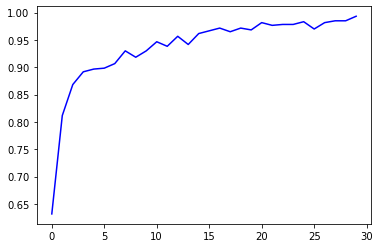

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 10. Model save

In [14]:
model.save('model_shoes1.h5')

In [5]:
from tensorflow import keras
model = keras.models.load_model(r"C:\Users\BKY\Downloads\model_shoes1.h5")

# 11. Testing

In [6]:
# Testing
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (IMAGE_WIDTH, IMAGE_HEIGHT))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Boots'
    elif result[0][1] == 1:
        prediction = 'Sandals'
    else:
        prediction = 'Slippers'
    return prediction

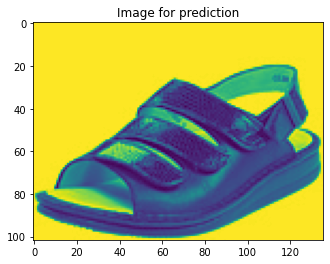

**********
[[0. 1. 0.]]
Sandals


In [34]:
from tensorflow.keras.preprocessing import image



from matplotlib import pyplot as plt
import cv2

img = cv2.imread(test_data_dir + '/image (1).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Image for prediction')
plt.show()


print("*"*10)

print(testing_image(test_data_dir + '/image (1).jpg'))



In [32]:

print(testing_image(test_data_dir + '/image (1).jpg'))

[[0. 1. 0.]]
Sandals


In [13]:
print(testing_image(test_data_dir + '/image (51).jpg'))

[[0. 0. 1.]]
Slippers


In [14]:
print(testing_image(test_data_dir + '/image (66).jpg'))

[[0. 1. 0.]]
Sandals


In [15]:
print(testing_image(test_data_dir + '/image (71).jpg'))

[[0. 0. 1.]]
Slippers


In [18]:
print(testing_image(test_data_dir + '/image (36).jpg'))

[[0. 0. 1.]]
Slippers
